In [ ]:
import pandas as pd
import geopandas as gpd

In [39]:
df_burden = pd.read_csv('https://raw.githubusercontent.com/bonitaw04/project-files/refs/heads/main/tract_pollution_burden.csv')
df_burden['geoid'] = df_burden['geoid'].astype(str).str[-6:]
df_burden.head()
# importing csv that has pollution burden by tract

,geoid,geoid20,year,denom_total_pop,pollution_burden_score,pollution_burden_score_pctile
0,115103,115103,2021,3381,6.13,44
1,265301,265301,2021,11977,5.38,22
2,577504,577504,2021,1378,4.29,7
3,206020,206020,2021,8947,7.97,90
4,980013,980013,2021,0,0.00,1


In [38]:
gdf_income = gpd.read_file('https://raw.githubusercontent.com/bonitaw04/project-files/main/income/Median_Income_and_AMI_(census_tract).shp', dtype={'tract': str})
gdf_income['tract'] = gdf_income['tract'].astype(str).str[-6:]
gdf_income.head()
# importing csv that has income data by tract

/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option DTYPE
  return ogr_read(


,tract,med_hh_inc,med_hh_i_1,ami_catego,below_med_,below_60pc,below_mode,sup_dist,csa,spa,ESRI_OID,Shape__Are,Shape__Len,geometry
0,101110,84091.0,1558,Low Income,Yes,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4842,1.232981e+07,14765.649004,"POLYGON ((6470790.85 1916994.683, 6470793.264 ..."
1,101122,99583.0,1407,Low Income,No,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4843,2.908866e+07,30028.213771,"POLYGON ((6470068.041 1921991.655, 6471127.217..."
2,101220,69676.0,1357,Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4844,7.532651e+06,12504.552130,"POLYGON ((6475263.687 1914312.279, 6475267.738..."
3,101221,53798.0,1483,Very Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4845,3.874399e+06,8938.421349,"POLYGON ((6471180.326 1915672.127, 6473075.818..."
4,101222,45662.0,948,Very Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4846,3.090538e+06,9750.960420,"POLYGON ((6473071.983 1914337.88, 6474449.622 ..."


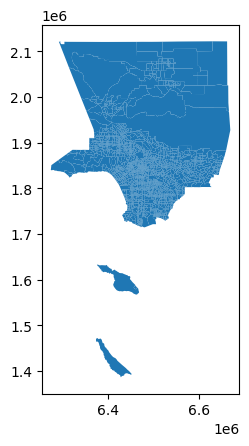

In [ ]:
ax = gdf_income.plot()

In [35]:
gdf_burden_income = pd.merge(
    left=gdf_income, right=df_burden, how="left", left_on="tract", right_on="geoid"
)
gdf_burden_income.head()
# merging data sets that include pollution burden and income

,tract,med_hh_inc,med_hh_i_1,ami_catego,below_med_,below_60pc,below_mode,sup_dist,csa,spa,ESRI_OID,Shape__Are,Shape__Len,geometry,geoid,geoid20,year,denom_total_pop,pollution_burden_score,pollution_burden_score_pctile
0,101110,84091.0,1558,Low Income,Yes,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4842,1.232981e+07,14765.649004,"POLYGON ((6470790.85 1916994.683, 6470793.264 ...",101110,101110.0,2021.0,4283.0,4.27,6.0
1,101122,99583.0,1407,Low Income,No,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4843,2.908866e+07,30028.213771,"POLYGON ((6470068.041 1921991.655, 6471127.217...",101122,101122.0,2021.0,3405.0,3.76,4.0
2,101220,69676.0,1357,Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4844,7.532651e+06,12504.552130,"POLYGON ((6475263.687 1914312.279, 6475267.738...",101220,101220.0,2021.0,3702.0,4.61,10.0
3,101221,53798.0,1483,Very Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4845,3.874399e+06,8938.421349,"POLYGON ((6471180.326 1915672.127, 6473075.818...",101221,101221.0,2021.0,3455.0,4.24,6.0
4,101222,45662.0,948,Very Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,4846,3.090538e+06,9750.960420,"POLYGON ((6473071.983 1914337.88, 6474449.622 ...",101222,101222.0,2021.0,2892.0,4.24,6.0


In [40]:
df_trees = pd.read_csv('https://raw.githubusercontent.com/bonitaw04/project-files/refs/heads/main/existing_tree_cover.csv')
df_trees['geoid'] = df_trees['geoid'].astype(str).str[-6:]
df_trees.head()
# importing third data set that includes tree coverage by tract

,geoid,geoid20,year,denom_totalarea,existing_canopy_count,existing_canopy_pct,possible_canopy_count,possible_canopy_pct
0,101110,101110,2016,12298162.00,2.827224e+06,22.988993,5.520896e+06,44.892036
1,101122,101122,2016,28511170.00,7.808231e+06,27.386568,1.620918e+07,56.852043
2,101220,101220,2016,7528351.50,2.091405e+06,27.780382,2.932750e+06,38.956078
3,101221,101221,2016,3798988.00,6.090615e+05,16.032204,1.648872e+06,43.402924
4,101222,101222,2016,3180596.75,5.099198e+05,16.032206,1.380472e+06,43.402924


In [37]:
gdf_all = pd.merge(
    left=gdf_burden_income, right=df_trees, how="left", left_on="tract", right_on="geoid"
)
gdf_all.head()
# merging the now merged income/pollution data set with the third tree data set

,tract,med_hh_inc,med_hh_i_1,ami_catego,below_med_,below_60pc,below_mode,sup_dist,csa,spa,...,pollution_burden_score,pollution_burden_score_pctile,geoid_y,geoid20_y,year_y,denom_totalarea,existing_canopy_count,existing_canopy_pct,possible_canopy_count,possible_canopy_pct
0,101110,84091.0,1558,Low Income,Yes,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,...,4.27,6.0,101110,101110.0,2016.0,12298162.00,2.827224e+06,22.988993,5.520896e+06,44.892036
1,101122,99583.0,1407,Low Income,No,No,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,...,3.76,4.0,101122,101122.0,2016.0,28511170.00,7.808231e+06,27.386568,1.620918e+07,56.852043
2,101220,69676.0,1357,Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,...,4.61,10.0,101220,101220.0,2016.0,7528351.50,2.091405e+06,27.780382,2.932750e+06,38.956078
3,101221,53798.0,1483,Very Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,...,4.24,6.0,101221,101221.0,2016.0,3798988.00,6.090615e+05,16.032204,1.648872e+06,43.402924
4,101222,45662.0,948,Very Low Income,Yes,Yes,Yes,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,...,4.24,6.0,101222,101222.0,2016.0,3180596.75,5.099198e+05,16.032206,1.380472e+06,43.402924


In [41]:
boyle_tracts = ['203100', '203200', '203300', '203601', '203602', '203710', '203720', '203800', '203900', '204110', '204120', '204200', '204300', '204410', '204420', '204600', '204700', '204810', '204820', '204910', '204920', '205110', '205120', '206050', '206053', '206054']
gdf_boyle = gdf_all[gdf_all["tract"].isin(boyle_tracts)]
gdf_boyle.shape
# assigning the specific tracts that make up the boyle heights neighborhood

(26, 28)

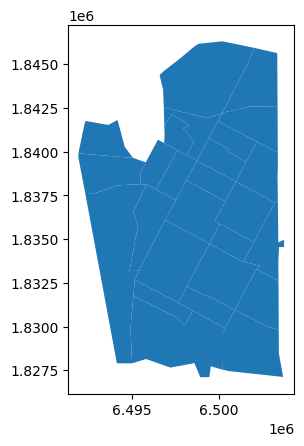

In [ ]:
ax = gdf_boyle.plot()

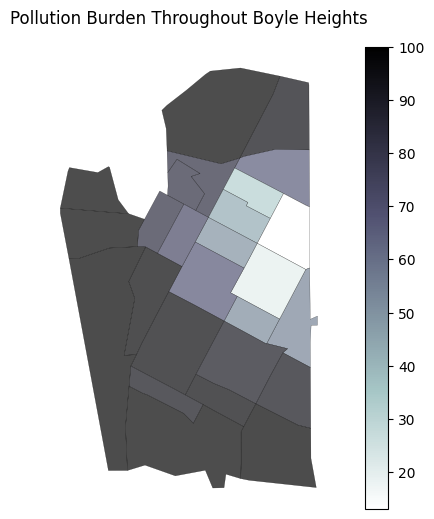

In [45]:
ax = gdf_boyle.plot(
    column="pollution_burden_score_pctile", cmap="bone_r", edgecolor="k", lw=0.2, figsize=(9, 6), legend=True, alpha=0.7
)
ax.set_title("Pollution Burden Throughout Boyle Heights")

ax.axis("off")
ax.get_figure().savefig("bh-pollution.png", dpi=300, bbox_inches="tight")

## **Visual 1: Pollution Burden Score**

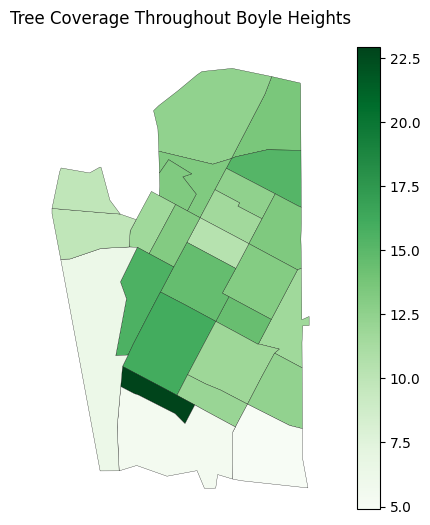

In [46]:
ax = gdf_boyle.plot(
    column="existing_canopy_pct", cmap="Greens", edgecolor="k", lw=0.2, figsize=(9, 6), legend=True
)
ax.set_title("Tree Coverage Throughout Boyle Heights")
ax.axis("off")
ax.get_figure().savefig("bh-trees.png", dpi=300, bbox_inches="tight")

##  **Visual 2: Tree Coverage in Boyle Heights**

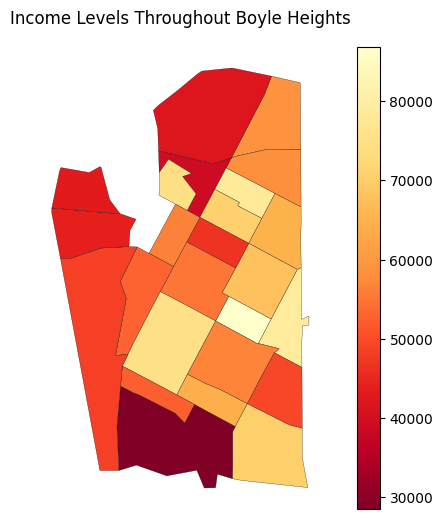

In [47]:
ax = gdf_boyle.plot(
    column="med_hh_inc", cmap="YlOrRd_r", edgecolor="k", lw=0.2, figsize=(9, 6), legend=True
)
ax.set_title("Income Levels Throughout Boyle Heights")
ax.axis("off")
ax.get_figure().savefig("bh-income.png", dpi=300, bbox_inches="tight")

##  **Visual 3: Income Levels in Boyle Heights**

New data for this project were found by all group members.
Initial code concepts by sam, data merging and map creation by Bonita.Revisions by Kimmy.